# Polycrystalline graphene



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from ssm.build import regular_polygons
from ssm import plotutils, graphs
from ssm.structures import Structures
from ssm.register import RMSD
from ssm.strain import zero_median,planar_strain

## Sample Structure

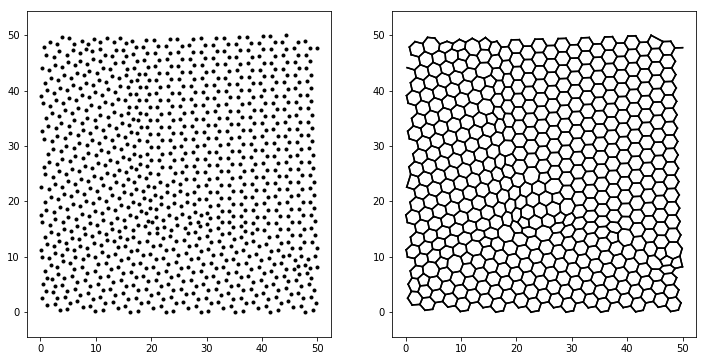

In [2]:
points = np.load('poly_graphene.npy')
adjacency = graphs.urquhart(points)

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].plot(points[:,0], points[:,1], 'k.')
plotutils.graph_embedding(points, adjacency, ax = axes[1])
for ax in axes:
    ax.axis('equal')

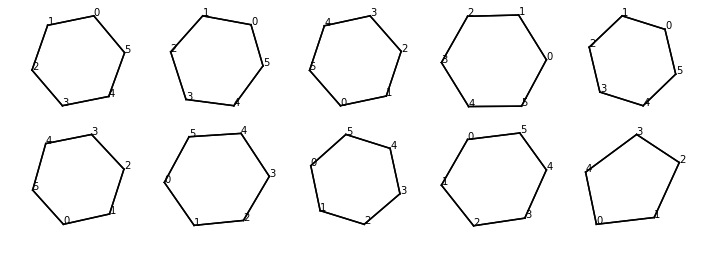

In [77]:
faces = graphs.find_faces(points, adjacency)
structures = Structures(points, faces, adjacency)

fig,axes = plt.subplots(2,5,figsize=(12,4))
plotutils.show_structures(structures, axes=axes.ravel(), show_order=True)
for ax in axes.ravel():
    ax.axis('equal')
    ax.axis('off')

## Template structure

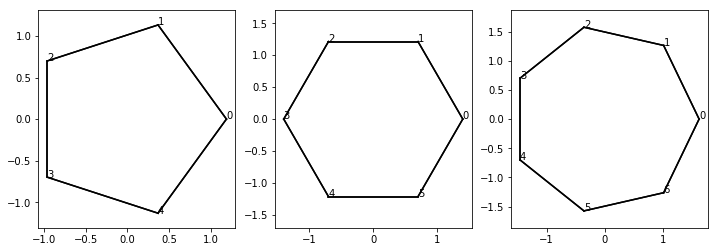

In [101]:
templates = regular_polygons(1.4, [5,6,7])

fig,axes = plt.subplots(1,3,figsize=(12,4))
plotutils.show_structures(templates, axes, show_order=True)
for ax in axes:
    ax.axis('equal')

## Pairing

In [102]:
rmsd_calc = RMSD(transform='similarity', pivot='cop')
rmsd = rmsd_calc.register(templates, structures)

In [108]:
import matplotlib.patches as mpatches

def add_labeled_patches(segments, labels, ax, colors, descriptions=None):
    
    if descriptions is None:
        descriptions = {label:label for label in labels}
    
    proxies=[]
    for label,color in zip(np.unique(labels), plt.cm.Dark2.colors):
        label_faces = [segment for segment, has_label in zip(segments, label == labels) if has_label]
        
        plotutils.add_patches(points, label_faces, c=color, ax=axes[1])
        
        proxies.append(mpatches.Patch(color=color, label=descriptions[label]))

    ax.legend(handles=proxies)    

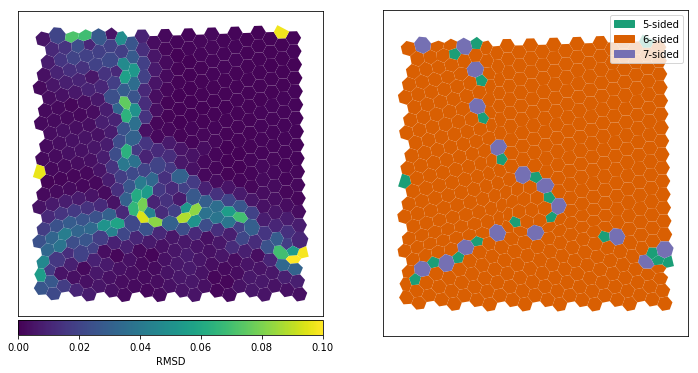

In [112]:
min_rmsd = rmsd_calc.min_rmsd(structures)
labels = rmsd_calc.argmin_rmsd(structures)

fig,axes = plt.subplots(1,2,figsize=(12,6))

p = plotutils.add_patches(points, faces, c=min_rmsd, ax=axes[0], clim=[0,.1])
plotutils.add_colorbar(p, axes[0], 'RMSD', 'bottom')

descriptions = {0:'5-sided',1:'6-sided',2:'7-sided'}

add_labeled_patches(faces, labels, axes[1], plt.cm.Dark2.colors, descriptions)

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([]);

## Strain

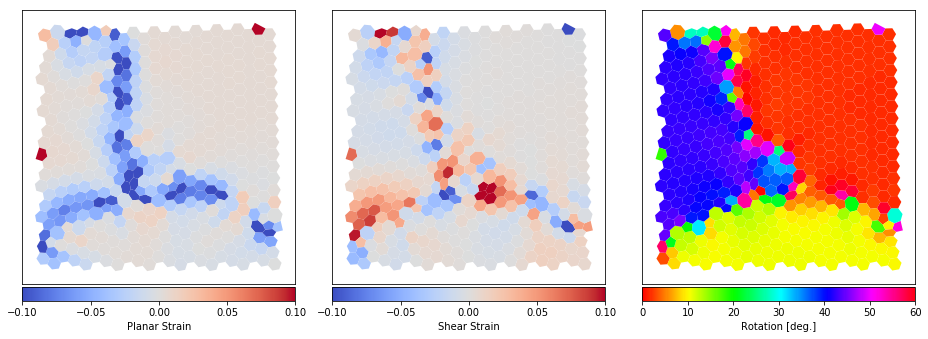

In [124]:
strain, rotation = rmsd_calc.calc_strain(structures)
strain = zero_median(strain)

planar = planar_strain(strain)
shear = strain[:,0,1]
rotation = (rotation % (2*np.pi/6)) / np.pi * 180

fig,axes = plt.subplots(1,3,figsize=(13,6))

p = plotutils.add_patches(points, faces, c=planar, ax=axes[0], clim=[-.1,.1], cmap='coolwarm')
plotutils.add_colorbar(p, axes[0], 'Planar Strain', 'bottom', ticks=np.linspace(-.1,.1,5))

p = plotutils.add_patches(points, faces, c=shear, ax=axes[1], clim=[-.1,.1], cmap='coolwarm')
plotutils.add_colorbar(p, axes[1], 'Shear Strain', 'bottom', ticks=np.linspace(-.1,.1,5))

p = plotutils.add_patches(points, faces, c=rotation, ax=axes[2], clim=[0,60], cmap='hsv')
plotutils.add_colorbar(p, axes[2], 'Rotation [deg.]', 'bottom')

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()